<a href="https://colab.research.google.com/github/Victorvv1/Curso-de-Analisis-de-Datos-/blob/main/Ejercicios_de_Practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejercicio 1
### Esquema de la tabla Mundo:

- **nombre** (varchar)
- **continente** (varchar)
- **área** (int)
- **población** (int)
- **PIB** (bigint)

`nombre` es la clave primaria (columna con valores únicos) de esta tabla. Cada fila de esta tabla proporciona información sobre el nombre de un país, el continente al que pertenece, su área, la población y su valor de PIB.

Un país es considerado grande si cumple al menos una de las siguientes condiciones:
- Tiene un área de al menos tres millones (es decir, 3000000 km²).
- Tiene una población de al menos veinticinco millones (es decir, 25000000).

Escribe una solución para encontrar el nombre, la población y el área de los países grandes. Devuelve la tabla de resultados en cualquier orden.

### Ejemplo 1:

**Entrada:**

Tabla Mundo:
- Afganistán, Asia, 652230 km², 25500100 habitantes, 20343000000 PIB
- Albania, Europa, 28748 km², 2831741 habitantes, 12960000000 PIB
- Argelia, África, 2381741 km², 37100000 habitantes, 188681000000 PIB
- Andorra, Europa, 468 km², 78115 habitantes, 3712000000 PIB
- Angola, África, 1246700 km², 20609294 habitantes, 100990000000 PIB

**Salida:**

Tabla de países grandes:
- Afganistán, 25500100 habitantes, 652230 km²
- Argelia, 37100000 habitantes, 2381741 km²


In [ ]:
import pandas as pd

world_data = {
    'name': ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola'],
    'continent': ['Asia', 'Europe', 'Africa', 'Europe', 'Africa'],
    'area': [652230, 28748, 2381741, 468, 1246700],
    'population': [25500100, 2831741, 37100000, 78115, 20609294],
    'gdp': [20343000000, 12960000000, 188681000000, 3712000000, 100990000000]
}

world_df = pd.DataFrame(world_data)
world_df

,name,continent,area,population,gdp
0,Afghanistan,Asia,652230,25500100,20343000000
1,Albania,Europe,28748,2831741,12960000000
2,Algeria,Africa,2381741,37100000,188681000000
3,Andorra,Europe,468,78115,3712000000
4,Angola,Africa,1246700,20609294,100990000000


In [ ]:
def find_big_countries(world_df):
  # Encotramos los países "grandes" según los criterios:
  # - Área >= 3,000,000 km² o
  # - Población >= 25,000,000

  big_countries = world_df[(world_df['area'] >= 3_000_000) | (world_df['population'] >= 25_000_000)]

  result = big_countries[['name', 'population', 'area']]

  return result

result = find_big_countries(world_df)
result


,name,population,area
0,Afghanistan,25500100,652230
2,Algeria,37100000,2381741


In [ ]:
# paises_grandes = df_paises.query('(population >  25000000) | (area > 3000000)')

In [ ]:
import pandas as pd

def big_countries(world: pd.DataFrame) -> pd.DataFrame:
    big_countries_data = world[(world['area'] >= 3000000) | (world['population'] >= 25000000)]
    return big_countries_data[['name', 'population', 'area']]

## Ejercicio 2
### Esquema de la tabla Tweets:

- **tweet_id** (int)
- **contenido** (varchar)

`tweet_id` es la clave primaria (columna con valores únicos) de esta tabla.
El contenido consiste en caracteres alfanuméricos, '!', o ' ' y no otros caracteres especiales.
Esta tabla contiene todos los tweets en una aplicación de redes sociales.

Escribe una solución para encontrar los IDs de los tweets inválidos. Un tweet es inválido si el número de caracteres utilizados en el contenido del tweet es estrictamente mayor a 15.

Devuelve la tabla de resultados en cualquier orden.

### Ejemplo 1:

**Entrada:**

Tabla Tweets:
- Tweet ID: 1, Contenido: "Let us Code"
- Tweet ID: 2, Contenido: "More than fifteen chars are here!"

**Salida:**

Tabla de tweets inválidos:
- Tweet ID: 2

**Explicación:**

- Tweet 1 tiene una longitud de 11 caracteres. Es un tweet válido.
- Tweet 2 tiene una longitud de 33 caracteres. Es un tweet inválido.

In [ ]:
import pandas as pd

# Crear los datos para el DataFrame
data = {
    'tweet_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'content': [
        'Let us Code',                           # 11 caracteres
        'More than fifteen chars are here!',    # 33 caracteres
        'Hello World!',                         # 12 caracteres
        'Python is fun',                        # 12 caracteres
        'Data Science',                         # 12 caracteres
        'Pandas Library',                       # 13 caracteres
        'Machine Learning',                     # 16 caracteres
        'AI is the future',                     # 14 caracteres
        'Deep Learning',                        # 12 caracteres
        'Neural Networks',                      # 15 caracteres
        'Big Data Analysis',                    # 16 caracteres
        'Statistics',                           # 10 caracteres
        'Data Visualization',                   # 18 caracteres
        'Natural Language Processing',          # 26 caracteres
        'Advanced Analytics'                    # 17 caracteres
    ]
}

# Crear el DataFrame
tweets_df = pd.DataFrame(data)
tweets_df

,tweet_id,content
0,1,Let us Code
1,2,More than fifteen chars are here!
2,3,Hello World!
3,4,Python is fun
4,5,Data Science
5,6,Pandas Library
6,7,Machine Learning
7,8,AI is the future
8,9,Deep Learning
9,10,Neural Networks


In [ ]:
def invalid_tweets(tweets_df):
  invalid_tweets = tweets_df[tweets_df['content'].str.len() > 15]
  result = invalid_tweets[['tweet_id']]
  return result

invalid_tweets(tweets_df)

,tweet_id
1,2
6,7
7,8
10,11
12,13
13,14
14,15


In [ ]:
"""    tweet_id
1          2
6          7
7          8
10        11
12        13
13        14
14        15
"""

## Ejercicio 3
### Encontrar el n-ésimo salario más alto

## Estructura de la tabla Employee

| Column Name | Type |
|-------------|------|
| id          | int  |
| salary      | int  |

- `id` es la clave primaria (columna con valores únicos) para esta tabla.
- Cada fila de esta tabla contiene información sobre el salario de un empleado.

## Tarea

Escribe una solución para encontrar el n-ésimo salario más alto de la tabla Employee. Si no existe el n-ésimo salario más alto, devuelve null.

## Ejemplos

### Ejemplo 1:

```python
# Input:
Employee = [
    [1, 100],
    [2, 200],
    [3, 300]
]
n = 2

# Output:
nth_highest_salary(2)
# Resultado: 200

Ejemplo 2:
# Input:
Employee = [
    [1, 100]
]
n = 2

# Output:
nth_highest_salary(2)
# Resultado: None
```

In [ ]:
def nth_highest_salary(employee, N):
  df = employee['salary'].drop_duplicates()
  sorted_df = df.sort_values(ascending=False)
  if N > len(sorted_df):
    return pd.DataFrame({'Nth Highest Salary': [None]})
  nth = sorted_df.iloc[N-1]
  return pd.DataFrame({'Nth Highest Salary': [nth]})

# Ejemplo 1
Employee1 = pd.DataFrame({
    'id': [1, 2, 3],
    'salary': [100, 200, 300]
})
n1 = 2
print(f"Ejemplo 1:\n{nth_highest_salary(Employee1, n1)}")

# Ejemplo 2
Employee2 = pd.DataFrame({
    'id': [1],
    'salary': [100]
})
n2 = 2
print(f"\nEjemplo 2:\n{nth_highest_salary(Employee2, n2)}")

# Ejemplo adicional
Employee3 = pd.DataFrame({
    'id': [1, 2, 3, 4, 5],
    'salary': [300, 200, 300, 400, 500]
})
n3 = 3
print(f"\nEjemplo 3:\n{nth_highest_salary(Employee3, n3)}")

Ejemplo 1:
   Nth Highest Salary
0                 200

Ejemplo 2:
  Nth Highest Salary
0               None

Ejemplo 3:
   Nth Highest Salary
0                 300


## Ejercicio 4
```

+-------------+---------+
| Nombre de columna | Tipo|
+-------------+---------+
| id          | int     |
| name        | varchar |
| department  | varchar |
| managerId   | int     |
+-------------+---------+
```
id es la clave primaria (columna con valores únicos) para esta tabla.
Cada fila de esta tabla indica el nombre de un empleado, su departamento y el id de su gerente.
Si managerId es nulo, entonces el empleado no tiene un gerente.
Ningún empleado será el gerente de sí mismo.

Escribe una solución para encontrar gerentes con al menos cinco subordinados directos.

Devuelve la tabla de resultados en cualquier orden.

El formato del resultado se muestra en el siguiente ejemplo.

Ejemplo 1:

Entrada:
Tabla Employee:
```
+-----+-------+------------+-----------+
| id  | name  | department | managerId |
+-----+-------+------------+-----------+
| 101 | John  | A          | null      |
| 102 | Dan   | A          | 101       |
| 103 | James | A          | 101       |
| 104 | Amy   | A          | 101       |
| 105 | Anne  | A          | 101       |
| 106 | Ron   | B          | 101       |
+-----+-------+------------+-----------+

Salida:
+------+
| name |
+------+
| John |
+------+
```

In [ ]:
# Crear los datos de prueba
data = {
    'id': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
           201, 202, 203, 204, 205, 206, 207, 208, 209, 210,
           301, 302, 303, 304, 305],
    'name': ['John', 'Dan', 'James', 'Amy', 'Anne', 'Ron', 'Lisa', 'Kai', 'Zoe', 'Eva',
             'Mary', 'Tom', 'Sam', 'Alex', 'Emma', 'Olivia', 'Liam', 'Noah', 'Ava', 'Mia',
             'David', 'Sarah', 'Michael', 'Emily', 'Chris'],
    'department': ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
                   'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
                   'C', 'C', 'C', 'C', 'C'],
    'managerId': [None, 101, 101, 101, 101, 101, 101, 101, 201, 201,
                  None, 201, 201, 201, 201, 201, 201, 301, 301, 301,
                  None, 301, 301, 301, 301]
}

# Crear el DataFrame
df = pd.DataFrame(data)

In [ ]:
import pandas as pd

def find_managers(employee: pd.DataFrame) -> pd.DataFrame:
    required_managers = (
        employee
        .groupby('managerId', as_index=False)
        .agg(reporting=('id', 'count'))
        .query('reporting >= 5')
    )['managerId']

    return employee.loc[employee['id'].isin(required_managers), ['name']]

## Ejercicio 5
### Group Sold Products By The Date
https://leetcode.com/problems/group-sold-products-by-the-date/description/?envType=study-plan-v2&envId=30-days-of-pandas&lang=pythondata



In [ ]:
data = {
    'sell_date': [
        '2020-05-30', '2020-06-01', '2020-06-02', '2020-05-30',
        '2020-06-01', '2020-06-02', '2020-05-30',
        '2020-06-03', '2020-06-03', '2020-06-04', '2020-06-04', '2020-06-04'
    ],
    'product': [
        'Headphone', 'Pencil', 'Mask', 'Basketball',
        'Bible', 'Mask', 'T-Shirt',
        'Laptop', 'Mouse', 'Keyboard', 'Monitor', 'Keyboard'
    ]
}

df = pd.DataFrame(data)
activities = df

acts = activities.groupby('sell_date')['product'].apply(lambda x: ','.join(sorted(x.unique()))).reset_index()
acts['num_sold'] = acts['product'].apply(lambda x: len(x.split(',')))
acts = acts.rename(columns={'product': 'products'})
acts[['sell_date', 'num_sold', 'products']]

,sell_date,num_sold,products
0,2020-05-30,3,"Basketball,Headphone,T-Shirt"
1,2020-06-01,2,"Bible,Pencil"
2,2020-06-02,1,Mask
3,2020-06-03,2,"Laptop,Mouse"
4,2020-06-04,2,"Keyboard,Monitor"


In [ ]:
"""
   sell_date  num_sold                      products
0 2020-05-30         3  Basketball,Headphone,T-Shirt
1 2020-06-01         2                  Bible,Pencil
2 2020-06-02         1                          Mask
3 2020-06-03         2                  Laptop,Mouse
4 2020-06-04         2              Keyboard,Monitor

"""

https://pandastutor.com/vis.html#code=import%20pandas%20as%20pd%0Afrom%20datetime%20import%20datetime%0A%0Adata%20%3D%20%7B%0A%20%20%20%20'sell_date'%3A%20%5B%0A%20%20%20%20%20%20%20%20'2020-05-30',%20'2020-06-01',%20'2020-06-02',%20'2020-05-30',%20%0A%20%20%20%20%20%20%20%20'2020-06-01',%20'2020-06-02',%20'2020-05-30',%0A%20%20%20%20%20%20%20%20'2020-06-03',%20'2020-06-03',%20'2020-06-04',%20'2020-06-04',%20'2020-06-04'%0A%20%20%20%20%5D,%0A%20%20%20%20'product'%3A%20%5B%0A%20%20%20%20%20%20%20%20'Headphone',%20'Pencil',%20'Mask',%20'Basketball',%0A%20%20%20%20%20%20%20%20'Bible',%20'Mask',%20'T-Shirt',%0A%20%20%20%20%20%20%20%20'Laptop',%20'Mouse',%20'Keyboard',%20'Monitor',%20'Keyboard'%0A%20%20%20%20%5D%0A%7D%0A%0Adf%20%3D%20pd.DataFrame%28data%29%0A%0A%23%20Convertir%20la%20columna%20'sell_date'%20al%20tipo%20datetime%0Adf%5B'sell_date'%5D%20%3D%20pd.to_datetime%28df%5B'sell_date'%5D%29%0A%0Aactivities%20%3D%20df%0A%0A%23%20Funci%C3%B3n%20para%20resolver%20el%20ejercicio%0A%0Aacts%20%3D%20activities.groupby%28'sell_date'%29%5B'product'%5D.apply%28lambda%20x%3A%20','.join%28sorted%28x.unique%28%29%29%29%29.reset_index%28%29%0Aacts%5B'num_sold'%5D%20%3D%20acts%5B'product'%5D.apply%28lambda%20x%3A%20len%28x.split%28','%29%29%29%0A%0A%0A&d=2025-03-26&lang=py&v=v1

# Datos Bitly de 1.USA.gov

In [ ]:
import requests
url = 'https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/bitly_usagov/example.txt'

response = requests.get(url)
output_file = 'example.txt'

if response.status_code == 200:
  with open(output_file, 'w') as f:
    f.write(response.text)
  print(f'Descarga exitosa')
else:
  print("Fallo en la descarga")

Descarga exitosa


In [ ]:
import json
with open(output_file) as f:
  records = [json.loads(line) for line in f]

records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [ ]:
time_zones = [rec['tz'] for rec in records] # No todos los registros tienen este campo, por eso da error

KeyError: 'tz'

In [ ]:
records[0]['tz']

'America/New_York'

In [ ]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [ ]:
def get_counts(sequence):
  counts = {}
  for x in sequence:
    if x in counts:
      counts[x] += 1
    else:
      counts[x] = 1
  return counts

In [ ]:
from collections import defaultdict

def get_count2(sequence):
  counts = defaultdict(int)
  for x in sequence:
    counts[x] += 1
  return counts

In [ ]:
counts = get_counts(time_zones)
counts["America/New_York"]

1251

In [ ]:
len(time_zones)

3440

In [ ]:
def top_counts(count_dict, n=10):
  value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
  value_key_pairs.sort()
  return value_key_pairs[-n:]

In [ ]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [ ]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [ ]:
import pandas as pd
frame = pd.DataFrame(records)

In [ ]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [ ]:
frame['tz'].head()

,tz
0,America/New_York
1,America/Denver
2,America/New_York
3,America/Sao_Paulo
4,America/New_York


In [ ]:
tz_counts = frame['tz'].value_counts()
tz_counts.head()

,count
tz,
America/New_York,1251
,521
America/Chicago,400
America/Los_Angeles,382
America/Denver,191


In [ ]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ""] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts.head()

,count
tz,
America/New_York,1251
Unknown,521
America/Chicago,400
America/Los_Angeles,382
America/Denver,191


In [ ]:
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80

In [ ]:
plt.figure(figsize=(10,4)) ###

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Axes: ylabel='tz'>

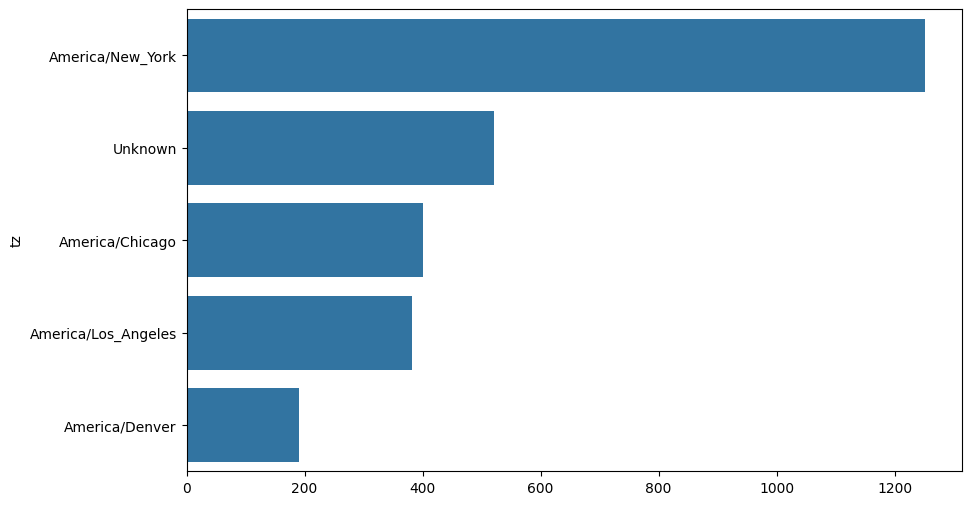

In [ ]:
import seaborn as sns
subset = tz_counts.head()
sns.barplot(y=subset.index, x=subset.to_numpy())

In [ ]:
frame["a"]

,a
0,"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) C..."
1,GoogleMaps/RochesterNY
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2...
3,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8) AppleWebKit/534.52.7 (KHTML, ..."
4,"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) C..."
...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT 6.1)
3556,"Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/1..."
3557,GoogleMaps/RochesterNY
3558,GoogleProducer


In [ ]:
frame["a"][1]

'GoogleMaps/RochesterNY'

In [ ]:
frame["a"][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [ ]:
frame["a"][51][:50]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [ ]:
results = pd.Series([x.split()[0] for x in frame["a"].dropna()])

In [ ]:
results.head()

,0
0,Mozilla/5.0
1,GoogleMaps/RochesterNY
2,Mozilla/4.0
3,Mozilla/5.0
4,Mozilla/5.0


In [ ]:
results.value_counts().head(8)

,count
Mozilla/5.0,2594
Mozilla/4.0,601
GoogleMaps/RochesterNY,121
Opera/9.80,34
TEST_INTERNET_AGENT,24
GoogleProducer,21
Mozilla/6.0,5
BlackBerry8520/5.0.0.681,4


In [ ]:
cframe = frame[frame["a"].notna()].copy()

In [ ]:
cframe.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) C...",US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/031612.cfm,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8) AppleWebKit/534.52.7 (KHTML, ...",BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) C...",US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/134127368672998.png,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [ ]:
import numpy as np
cframe['os'] = np.where(cframe['a'].str.contains("Windows"), "Windows", "Not Windows")
cframe['os'].head()

,os
0,Windows
1,Not Windows
2,Windows
3,Not Windows
4,Windows


In [ ]:
by_tz_os = cframe.groupby(['tz', 'os'])

In [ ]:
by_tz_os

In [ ]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [ ]:
indexer = agg_counts.sum("columns").argsort()

In [ ]:
indexer.head()

,0
tz,
,2
Africa/Cairo,7
Africa/Casablanca,5
Africa/Ceuta,4
Africa/Johannesburg,14


In [ ]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [ ]:
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [ ]:
agg_counts.sum(axis="columns").nlargest(10)

,0
tz,
America/New_York,1251.0
,521.0
America/Chicago,400.0
America/Los_Angeles,382.0
America/Denver,191.0
Europe/London,74.0
Asia/Tokyo,37.0
Pacific/Honolulu,36.0
Europe/Madrid,35.0


In [ ]:
count_subset = count_subset.stack()

AttributeError: 'Series' object has no attribute 'stack'

In [ ]:
count_subset

tz                   os         
America/Sao_Paulo    Not Windows     13.0
                     Windows         20.0
Europe/Madrid        Not Windows     16.0
                     Windows         19.0
Pacific/Honolulu     Not Windows      0.0
                     Windows         36.0
Asia/Tokyo           Not Windows      2.0
                     Windows         35.0
Europe/London        Not Windows     43.0
                     Windows         31.0
America/Denver       Not Windows    132.0
                     Windows         59.0
America/Los_Angeles  Not Windows    130.0
                     Windows        252.0
America/Chicago      Not Windows    115.0
                     Windows        285.0
                     Not Windows    245.0
                     Windows        276.0
America/New_York     Not Windows    339.0
                     Windows        912.0
dtype: float64

In [ ]:
count_subset.name = "total"
count_subset.head()

tz                 os         
America/Sao_Paulo  Not Windows    13.0
                   Windows        20.0
Europe/Madrid      Not Windows    16.0
                   Windows        19.0
Pacific/Honolulu   Not Windows     0.0
Name: total, dtype: float64

In [ ]:
count_subset = count_subset.reset_index()
count_subset

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<Axes: xlabel='total', ylabel='tz'>

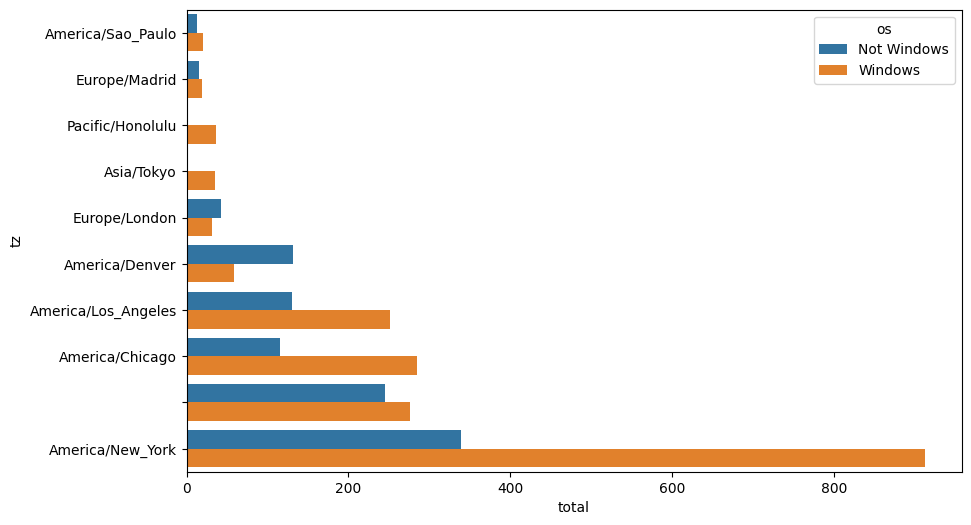

In [ ]:
sns.barplot(x='total', y='tz', hue='os', data=count_subset)

In [ ]:
def norm_total(group):
  group['normed_total'] = group['total'] / group['total'].sum()
  return group
results = count_subset.groupby('tz').apply(norm_total)
results.head()

<ipython-input-69-354c25878402>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = count_subset.groupby('tz').apply(norm_total)


tz           os  total  normed_total
tz                                                                   
                16                   Not Windows  245.0      0.470250
                17                       Windows  276.0      0.529750
America/Chicago 14  America/Chicago  Not Windows  115.0      0.287500
                15  America/Chicago      Windows  285.0      0.712500
America/Denver  10   America/Denver  Not Windows  132.0      0.691099

<Axes: xlabel='normed_total', ylabel='tz'>

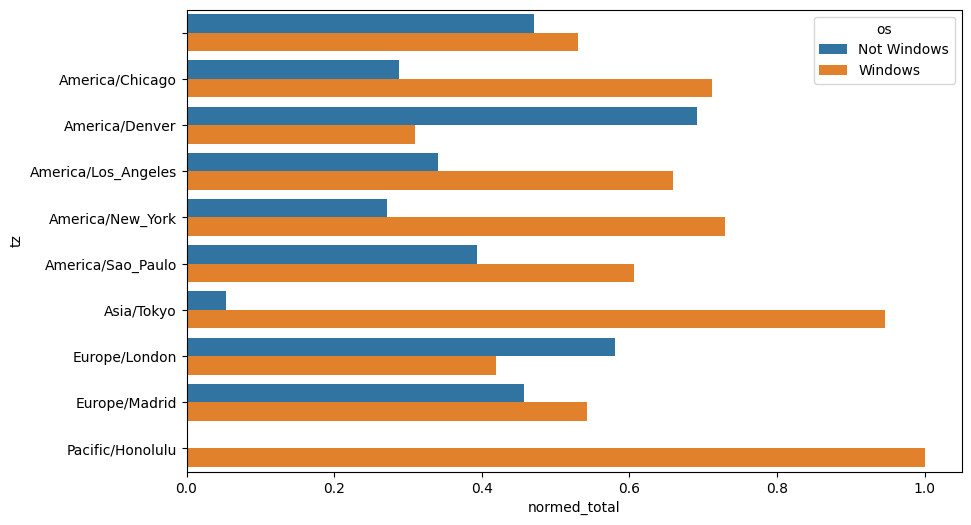

In [ ]:
sns.barplot(x='normed_total', y='tz', hue='os', data=results)

In [ ]:
g = count_subset.groupby('tz')
results2 = count_subset['total'] / g['total'].transform('sum')

In [ ]:
g =
results2 = count_subset['total'] / count_subset.groupby('tz')['total'].transform('sum')

In [ ]:
count_subset.head(10)

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


# Conjunto de datosMovieLens 1M

In [ ]:
import requests
base_url = 'https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/movielens/'

files = ['movies.dat',
    'ratings.dat',
    'users.dat'
]

def download_file(filename):
  url = base_url + filename

  response = requests.get(url)

  if response.status_code == 200:
    with open(filename, 'wb') as f:
      f.write(response.content)
    print(f"{filename} descargado con éxito")
  else:
    print(f"*Fallo al descargar {filename}")

for file in files:
  download_file(file)

movies.dat descargado con éxito
ratings.dat descargado con éxito
users.dat descargado con éxito


In [ ]:
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table("users.dat", sep="::",
                      header=None, names=unames, engine="python")

rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table("ratings.dat", sep="::",
                        header=None, names=rnames, engine="python")

mnames = ["movie_id", "title", "genres"]
movies = pd.read_table("movies.dat", sep="::",
                       header=None, names=mnames, engine="python")

In [ ]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


In [ ]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [ ]:
ratings_by_title = data.groupby('title').size()
ratings_by_title.head()

,0
title,
"$1,000,000 Duck (1971)",37
'Night Mother (1986),70
'Til There Was You (1997),52
"'burbs, The (1989)",303
...And Justice for All (1979),199


In [ ]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [ ]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [ ]:
top_female_ratings = mean_ratings.sort_values('F', ascending=False)
top_female_ratings.head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


In [ ]:
mean_ratings['diff'] = mean_ratings['M'] -  mean_ratings['F']

In [ ]:
sorted_by_diff = mean_ratings.sort_values('diff')
sorted_by_diff.head()

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777


In [ ]:
sorted_by_diff[::-1].head()

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787


In [ ]:
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title.head()

,rating
title,
"$1,000,000 Duck (1971)",1.092563
'Night Mother (1986),1.118636
'Til There Was You (1997),1.020159
"'burbs, The (1989)",1.107760
...And Justice for All (1979),0.878110


In [ ]:
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.head()

,rating
title,
"'burbs, The (1989)",1.107760
10 Things I Hate About You (1999),0.989815
101 Dalmatians (1961),0.982103
101 Dalmatians (1996),1.098717
12 Angry Men (1957),0.812731


In [ ]:
rating_std_by_title.sort_values(ascending=False)[:10]

,rating
title,
Dumb & Dumber (1994),1.321333
"Blair Witch Project, The (1999)",1.316368
Natural Born Killers (1994),1.307198
Tank Girl (1995),1.277695
"Rocky Horror Picture Show, The (1975)",1.260177
Eyes Wide Shut (1999),1.259624
Evita (1996),1.253631
Billy Madison (1995),1.249970
Fear and Loathing in Las Vegas (1998),1.246408


In [ ]:
movies['genres'].head()

,genres
0,Animation|Children's|Comedy
1,Adventure|Children's|Fantasy
2,Comedy|Romance
3,Comedy|Drama
4,Comedy


In [ ]:
movies['genres'].head().str.split('|')

,genres
0,"[Animation, Children's, Comedy]"
1,"[Adventure, Children's, Fantasy]"
2,"[Comedy, Romance]"
3,"[Comedy, Drama]"
4,[Comedy]


In [ ]:
movies['genre'] = movies.pop('genres').str.split('|')
movies['genre'].head()

,genre
0,"[Animation, Children's, Comedy]"
1,"[Adventure, Children's, Fantasy]"
2,"[Comedy, Romance]"
3,"[Comedy, Drama]"
4,[Comedy]


In [ ]:
movies_exploded = movies.explode('genre')
movies_exploded[:10]

,movie_id,title,genre
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance
3,4,Waiting to Exhale (1995),Comedy
3,4,Waiting to Exhale (1995),Drama


In [ ]:
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings) , users)
ratings_with_genre.head()

,movie_id,title,genre,user_id,rating,timestamp,gender,age,occupation,zip
0,1,Toy Story (1995),Animation,1,5,978824268,F,1,10,48067
1,1,Toy Story (1995),Animation,6,4,978237008,F,50,9,55117
2,1,Toy Story (1995),Animation,8,4,978233496,M,25,12,11413
3,1,Toy Story (1995),Animation,9,5,978225952,M,25,17,61614
4,1,Toy Story (1995),Animation,10,5,978226474,F,35,1,95370


In [ ]:
ratings_with_genre.groupby(['genre', 'age'])['rating'].mean().unstack()

age,1,18,25,35,45,50,56
genre,,,,,,,
Action,3.506385,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709
Adventure,3.449975,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064
Animation,3.476113,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233
Children's,3.241642,3.294257,3.426873,3.518423,3.527593,3.556555,3.621822
Comedy,3.497491,3.460417,3.490385,3.561984,3.591789,3.646868,3.650949
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Fantasy,3.317647,3.353778,3.452484,3.482301,3.532468,3.581570,3.532700


# Nombres de bebés de Estados Unidos entre 1880 y 2010

In [ ]:
! mkdir babynames

In [ ]:
base_url = 'https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/babynames/'
start_year = 1880
end_year = 2010

for year in range(start_year, end_year + 1):
  filename = f'yob{year}.txt'
  url = base_url + filename
  output_path = f'babynames/{filename}'

  response = requests.get(url)

  if response.status_code == 200:
    with open(output_path, 'wb') as f:
      f.write(response.content)
    print(f'Descarga exitosa de {filename}')
  else:
    print(f"Fallo al descargar {filename}")

In [ ]:
pieces = []
for year in range(1880, 2011):
  path = f'babynames/yob{year}.txt'
  frame =  pd.read_csv(path, names=['name', 'sex', 'births'])

  frame['year'] = year
  pieces.append(frame)

In [ ]:
pieces[0:2]

[           name sex  births  year
 0          Mary   F    7065  1880
 1          Anna   F    2604  1880
 2          Emma   F    2003  1880
 3     Elizabeth   F    1939  1880
 4        Minnie   F    1746  1880
 ...         ...  ..     ...   ...
 1995     Woodie   M       5  1880
 1996     Worthy   M       5  1880
 1997     Wright   M       5  1880
 1998       York   M       5  1880
 1999  Zachariah   M       5  1880
 
 [2000 rows x 4 columns],
            name sex  births  year
 0          Mary   F    6919  1881
 1          Anna   F    2698  1881
 2          Emma   F    2034  1881
 3     Elizabeth   F    1852  1881
 4      Margaret   F    1658  1881
 ...         ...  ..     ...   ...
 1930     Wiliam   M       5  1881
 1931     Wilton   M       5  1881
 1932       Wing   M       5  1881
 1933       Wood   M       5  1881
 1934     Wright   M       5  1881
 
 [1935 rows x 4 columns]]

In [ ]:
names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [ ]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.head()

<ipython-input-122-02a324267c87>:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)


sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


<Axes: title={'center': 'Total de nacimientos por sexo y año'}, xlabel='year'>

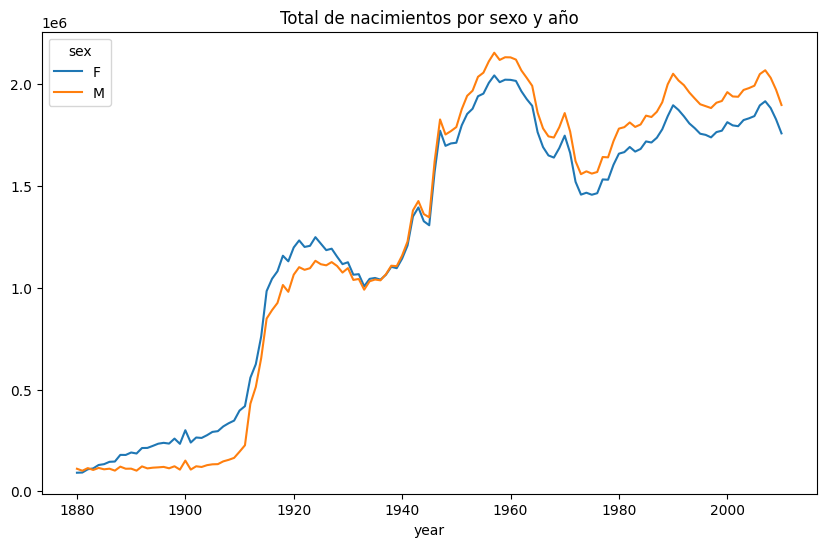

In [ ]:
total_births.plot(title='Total de nacimientos por sexo y año')

In [ ]:
def add_prop(group):
  group['prop'] = group['births'] / group['births'].sum()
  return group
names = names.groupby(['year','sex'],  group_keys=False).apply(add_prop)
names

<ipython-input-128-fb72191ed4bb>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  names = names.groupby(['year','sex'],  group_keys=False).apply(add_prop)


,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [ ]:
names.groupby(['year', 'sex'])['prop'].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [ ]:
def get_top1000(group):
  return group.sort_values('births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000.head()

<ipython-input-130-a61a9f1f611b>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top1000 = grouped.apply(get_top1000)


name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [ ]:
top1000 = top1000.reset_index(drop=True)
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Jaydan,M,194,2010,0.000102
261873,Camilo,M,194,2010,0.000102
261874,Bailey,M,194,2010,0.000102
261875,Destin,M,194,2010,0.000102


In [ ]:
boys = top1000[top1000['sex'] == "M"]
girls = top1000[top1000['sex'] == "F"]

In [ ]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc='sum')
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,5.0,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,5.0,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

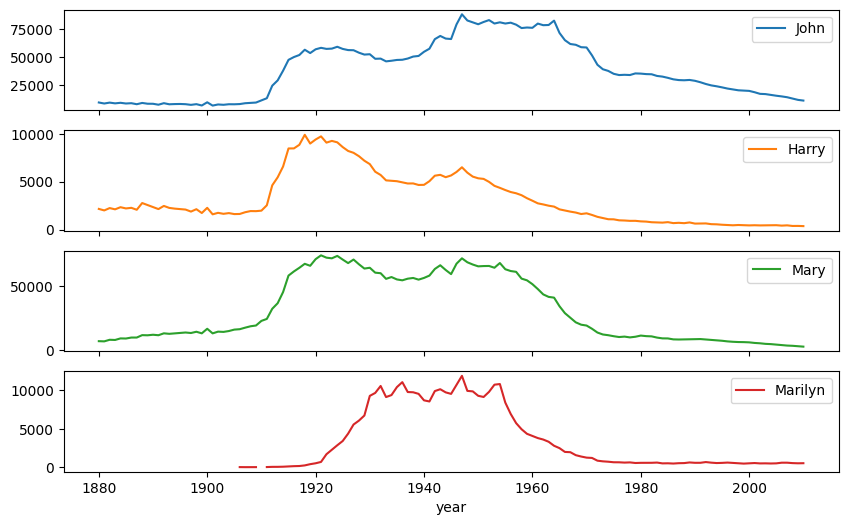

In [ ]:
subset = total_births[["John", "Harry", "Mary", "Marilyn"]]
subset.plot(subplots=True)

<Axes: xlabel='year'>

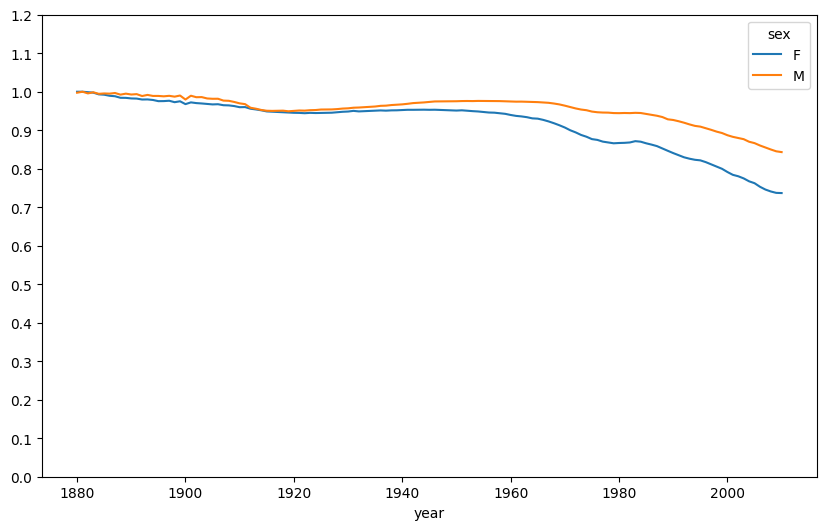

In [ ]:
table = top1000.pivot_table('prop', index='year', columns='sex',aggfunc='sum')
table.plot(yticks=np.linspace(0,1.2,13))

In [ ]:
df = boys[boys['year'] == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Jaydan,M,194,2010,0.000102
261873,Camilo,M,194,2010,0.000102
261874,Bailey,M,194,2010,0.000102
261875,Destin,M,194,2010,0.000102


In [ ]:
prop_cumsum = df['prop'].sort_values(ascending=False).cumsum()
prop_cumsum[:10]

,prop
260877,0.011523
260878,0.020934
260879,0.029959
260880,0.038930
260881,0.047817
260882,0.056579
260883,0.065155
260884,0.073414
260885,0.081528
260886,0.089621


In [ ]:
prop_cumsum.searchsorted(0.5)

np.int64(116)

In [ ]:
df = boys[boys.year == 1900]
in1900 = df.sort_values("prop", ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

np.int64(25)

In [ ]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values("prop", ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)
diversity = diversity.unstack()

<ipython-input-141-94252a958cf6>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)


<Axes: title={'center': 'Number of popular names in top 50%'}, xlabel='year'>

<Figure size 1000x600 with 0 Axes>

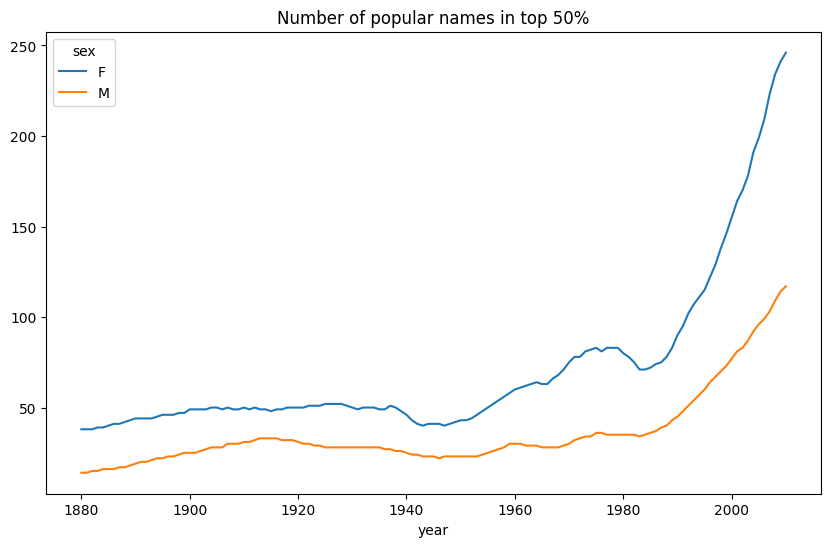

In [ ]:
fig = plt.figure()
diversity.head()
diversity.plot(title="Number of popular names in top 50%")

In [ ]:
def get_last_letter(x):
    return x[-1]

last_letters = names["name"].map(get_last_letter)
last_letters.name = "last_letter"

table = names.pivot_table("births", index=last_letters,
                          columns=["sex", "year"], aggfunc=sum)

<ipython-input-143-f61e34b32006>:7: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = names.pivot_table("births", index=last_letters,


In [ ]:
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
...              ...      ...      ...      ...      ...      ...      ...   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d             1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e            54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   
...              ...      ...      ...  ...       ...       ...       ...   
v                NaN      NaN      NaN  ...    1209.0    1332.0    1652.0   
w                NaN      NaN      NaN  ...   52265.0   50103.0   49079.0   
x                NaN      NaN      NaN  ...   10691.0   11009.0   11718.0   
y            14980.0  17931.0  17601.0  ...  139109.0  134557.0  130569.0   
z              188.0    238.0    277.0  ...    2840.0    2737.0    2722.0   

sex                                                                      \
year             2004      2005      2006      2007      2008      2009   
last_letter                                                               
a             38650.0   36838.0   36156.0   34654.0   32901.0   31430.0   
b             45914.0   43144.0   42600.0   42123.0   39945.0   38862.0   
c             26778.0   26078.0   26635.0   26864.0   25318.0   24048.0   
d             51754.0   50670.0   51410.0   50595.0   47910.0   46172.0   
e            142098.0  141123.0  142999.0  143698.0  140966.0  135496.0   
...               ...       ...       ...       ...       ...       ...   
v              1823.0    1794.0    2010.0    2295.0    2418.0    2589.0   
w             47556.0   45464.0   43217.0   40251.0   36937.0   33181.0   
x             12399.0   13025.0   13992.0   14306.0   14834.0   16640.0   
y            128367.0  125190.0  123707.0  123397.0  122633.0  112922.0   
z              2710.0    2903.0    3086.0    3301.0    3473.0    3633.0   

sex                    
year             2010  
last_letter            
a             28438.0  
b             38859.0  
c             23125.0  
d             44398.0  
e            129012.0  
...               ...  
v              2723.0  
w             30656.0  
x             16352.0  
y            110425.0  
z              3476.0  

[26 rows x 262 columns]